In [19]:
import numpy as np
import pandas as pd
import csv

In [41]:
f_fwd = open("enhancer_fwd_counts.csv",'r',encoding='UTF-8')
reader = csv.reader(f_fwd)
fn = open("fwd_clean.csv",'w',newline='',encoding = 'UTF-8')
writer = csv.writer(fn)

In [42]:
f= open("run2samplename.txt",'r')
lines = f.readlines()
dictp = {}
for i in lines:
    k = i.split("\t")
    g = k[1].split("\n")
    g = g[0]
    n = {k[0]:g}
    dictp.update(n)
f.close()

In [43]:
flag = 0
for i in reader:
    if flag == 0:
        writer.writerow(i)
        k=["type"]
        for r in range(1,len(i)):
            try :
                addi = dictp[i[r]]
            except KeyError :
                addi = "Nah"
            addis = addi.split("_")
            if addis[0] == "E6.5": addit = addis[0]+addis[1]
            else : addit = addis[0]
            k.append(addit)
        writer.writerow(k)
        flag = 1
    elif i[0].find("Enh") == -1 :
        print(i[0])
        continue
    else:
        writer.writerow(i)
    

__no_feature
__ambiguous
__too_low_aQual
__not_aligned
__alignment_not_unique


In [44]:
stages = ["MII-Oocyte","2-cell","4-cell","8-cell","morula","ICM","TE","E6.5Epi","E6.5Exe"]

In [45]:
df = pd.read_csv("fwd_clean.csv",header = 1)
new = df[['type']]
for i in stages:
    tempn= df.filter(like=i).columns
    tempdf = df[tempn]
    tempdf['sum'] = tempdf.apply( lambda x: (x.sum())/len(tempdf.columns),axis = 1)
#     for k,row in tempdf.iterrows():
#         j = row.values
#         a = list(filter(lambda x: x != 0, j))
#         if len(a) < 2 :
#             tempdf.loc[k,'sum'] = 0
#         else: 
#             tempdf.loc[k,'sum'] = sum(a)/len(a)
    new[ 'avr_'+i ] = tempdf['sum']
    print(i) 

<ipython-input-45-56306dbea1be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['sum'] = tempdf.apply( lambda x: (x.sum())/len(tempdf.columns),axis = 1)
<ipython-input-45-56306dbea1be>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new[ 'avr_'+i ] = tempdf['sum']


MII-Oocyte
2-cell
4-cell
8-cell
morula
ICM
TE
E6.5Epi
E6.5Exe


In [46]:
new

,type,avr_MII-Oocyte,avr_2-cell,avr_4-cell,avr_8-cell,avr_morula,avr_ICM,avr_TE,avr_E6.5Epi,avr_E6.5Exe
0,Enh000001,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Enh000002,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Enh000003,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Enh000004,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Enh000005,0.0,0.0,0.5000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
306639,Enh306640,0.0,0.5,72.2125,150.161111,170.700000,137.212500,71.766667,100.433333,67.650000
306640,Enh306641,0.0,0.0,57.7125,124.883333,122.533333,107.754167,49.766667,72.416667,51.733333
306641,Enh306642,0.0,0.0,13.0000,32.333333,54.000000,30.958333,20.250000,28.000000,9.250000
306642,Enh306643,0.0,0.0,37.0625,74.166667,85.500000,66.166667,51.125000,62.750000,60.416667


In [125]:
k=np.array([2,3,0,1])

In [134]:
a=list(filter(lambda x: x != 0, k))
sum(a)

6

In [47]:
new.to_csv("fwd_avr.csv")

下面搞反向序列的

In [49]:
f_rev = open("enhancer_rev_counts.csv",'r',encoding='UTF-8')
reader = csv.reader(f_rev)
fn2 = open("rev_clean.csv",'w',newline='',encoding='UTF-8')
writer = csv.writer(fn2)
flag = 0
for i in reader:
    if flag == 0:
        writer.writerow(i)
        k=["type"]
        for r in range(1,len(i)):
            try :
                addi = dictp[i[r]]
            except KeyError :
                addi = "Nah"
            addis = addi.split("_")
            if addis[0] == "E6.5": addit = addis[0]+addis[1]
            else : addit = addis[0]
            k.append(addit)
        writer.writerow(k)
        flag = 1
    elif i[0].find("Enh") == -1 :
        print(i[0])
        continue
    else:
        writer.writerow(i)

__no_feature
__ambiguous
__too_low_aQual
__not_aligned
__alignment_not_unique


In [50]:
df_r = pd.read_csv("rev_clean.csv",header = 1)
new_r = df_r[['type']]
for i in stages:
    tempn= df_r.filter(like=i).columns
    tempdf = df_r[tempn]
    tempdf['sum'] = tempdf.apply( lambda x: (x.sum())/len(tempdf.columns),axis = 1)
#     for k,row in tempdf.iterrows():
#         if ((row.values == 0).any() == True) & ((row.values == 0).all() == False):
#             tempdf.loc[k,'sum'] = -1
    new_r[ 'avr_'+i ] = tempdf['sum']
    print(i) 

<ipython-input-50-6db451686f6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['sum'] = tempdf.apply( lambda x: (x.sum())/len(tempdf.columns),axis = 1)
<ipython-input-50-6db451686f6e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_r[ 'avr_'+i ] = tempdf['sum']


MII-Oocyte
2-cell
4-cell
8-cell
morula
ICM
TE
E6.5Epi
E6.5Exe


In [51]:
new_r.to_csv("rev_avr.csv")

In [107]:
def filter1(r_fwd,r_rev,n):
    flag = 0
    for i in range(0,n):
        alll = r_fwd[i]+r_rev[i]
        if (alll == 0) | (r_fwd[i] == -1)|( r_rev[i] == -1):
            flag = flag + 1
            continue
        if (r_fwd[i]/alll < 0.05)|(r_fwd[i]/alll > 0.95):
            flag = flag + 1
            continue
    if flag == n:
        return 1
    else: return 0
    
        

In [52]:
new0 = pd.read_csv("fwd_avr.csv",header = 0)
new = new0.drop(columns = ['Unnamed: 0'])
new0 = pd.read_csv("rev_avr.csv",header = 0)
new_r = new0.drop(columns = ['Unnamed: 0'])

In [53]:
new_r

,type,avr_MII-Oocyte,avr_2-cell,avr_4-cell,avr_8-cell,avr_morula,avr_ICM,avr_TE,avr_E6.5Epi,avr_E6.5Exe
0,Enh000001,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000
1,Enh000002,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000
2,Enh000003,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000
3,Enh000004,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000
4,Enh000005,0.00,0.50,0.000000,0.000000,0.000000,0.000000,0.2500,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...
306639,Enh306640,0.00,1.25,79.608333,150.361111,157.766667,120.387500,70.1875,85.375,55.900000
306640,Enh306641,0.00,0.25,64.566667,112.416667,120.766667,93.595833,48.3125,57.875,38.816667
306641,Enh306642,0.00,0.00,14.375000,31.333333,44.750000,26.125000,16.0000,14.250,14.250000
306642,Enh306643,0.25,0.00,31.041667,53.000000,61.250000,62.833333,38.8125,58.000,46.583333


In [54]:
new['filter1'] = 0
new_r['filter1'] = 0
for k,row in new.iterrows():
    flag = 0
    for i in stages: 
        alll = new.loc[k,'avr_'+i] + new_r.loc[k,'avr_'+i]
        if (alll == 0):
            flag = flag + 1
            continue
        if (new.loc[k,'avr_'+i]/alll > 0.6)|(new.loc[k,'avr_'+i]/alll < 0.4):
            flag = flag + 1
            continue
    if flag == len(stages):
        new.loc[k,'filter1'] = 1
        new_r.loc[k,'filter1'] = 1      
    

In [104]:
dit = {1:[2,34,5],4:[3,25,2],6:[3,2,5]}
ttste = pd.DataFrame(dit)

In [108]:
new[0,'avr_MII-Oocyte']

In [55]:
new_fwd = new.loc[new['filter1'] == 0]
new_fwd.to_csv("fwd_avr_f1.csv")
new_rev = new_r.loc[new_r['filter1'] == 0]
new_rev.to_csv("rev_avr_f1.csv")

,type,avr_MII-Oocyte,avr_2-cell,avr_4-cell,avr_8-cell,avr_morula,avr_ICM,avr_TE,avr_E6.5Epi,avr_E6.5Exe,filter1
0,Enh000001,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,Enh000002,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,Enh000003,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,Enh000004,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,Enh000005,0.000000,0.0000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
306608,Enh306609,0.000000,0.3750,1.341667,13.455556,3.666667,20.966667,33.133333,0.916667,0.850000,0
306609,Enh306610,0.000000,0.0000,4.050000,38.188889,12.666667,33.650000,49.466667,4.000000,7.933333,0
306610,Enh306611,0.733333,5.9375,201.058333,257.444444,207.683333,394.820833,254.108333,579.891667,722.666667,0
306611,Enh306612,0.000000,0.0000,0.375000,11.327778,6.791667,7.670833,13.237500,0.333333,7.350000,0


In [57]:
dp = pd.read_csv("fwd_avr_f1.csv")
l = dp['Unnamed: 0']
dc = pd.read_csv("fwd_clean.csv",header = 1)
dc_1 = dc.loc[l,]
dc_1.to_csv("fwd_origin_OI0.6.csv")

然后合并一下count结果，把count结果转成TPM

In [90]:
rev = pd.read_csv('fwd_avr_f1.csv',header = 0)
fwd = pd.read_csv('rev_avr_f1.csv',header = 0)

In [91]:
add1 = rev.copy()
add1=add1.drop(columns=['Unnamed: 0', 'type','filter1'])
add2 = fwd.copy()
add2=add2.drop(columns=['Unnamed: 0', 'type','filter1'])

In [92]:
add = add1+add2

In [93]:
enh

,Unnamed: 0,name,start,end,len
0,16,Enh000017,3053410,3053878,468
1,17,Enh000018,3054529,3055251,722
2,18,Enh000019,3056107,3056369,262
3,19,Enh000020,3057074,3057556,482
4,20,Enh000021,3057627,3057951,324
...,...,...,...,...,...
51093,306639,Enh306640,90824038,90825836,1798
51094,306640,Enh306641,90825040,90825586,546
51095,306641,Enh306642,90826119,90826671,552
51096,306642,Enh306643,90828152,90829213,1061


In [107]:
enh = pd.read_csv('../enhancers_f1.csv')

In [94]:
add_co = add.copy()

In [85]:
allav

[237882.33333329018,
 1392898.5166629257,
 1035783.0833315075,
 502575.7499993975,
 510538.3166669435,
 482679.6749997211,
 354201.13749965007,
 267717.49999991053,
 256653.12499979496]

In [86]:
enh['len']= enh['end']-enh['start']

In [96]:
for i in add.columns:
    add_co[i]=add[i]*1000/enh['len']

In [98]:
add_co2 = add_co.copy()

In [101]:
allav = []
for i in add_co.columns:
    allav.append(sum(add_co[i]))
allav

[464150.6312240099,
 3034885.7135627703,
 2144061.932481894,
 1000279.8979271926,
 984305.3972384421,
 897000.8653503371,
 650242.1672942889,
 471029.5587555457,
 453932.5607459588]

In [102]:
k = 0
for i in add.columns:
    add_co2[i] = (add_co[i]/allav[k])*1000000
    k=k+1


In [108]:
enh_tpm = enh.join(add_co2)

In [110]:
enh_tpm.to_csv('enh_TPM.csv')

In [109]:
enh_tpm

,Unnamed: 0,name,chr,start,end,avr_MII-Oocyte,avr_2-cell,avr_4-cell,avr_8-cell,avr_morula,avr_ICM,avr_TE,avr_E6.5Epi,avr_E6.5Exe
0,16,Enh000017,chr1,3053410,3053878,0.000000,0.000000,2.491477,4.984360,13.024934,19.652384,6.572173,0.000000,0.000000
1,17,Enh000018,chr1,3054529,3055251,0.000000,0.228187,77.680240,242.775999,197.701179,1022.181296,462.751098,0.000000,3.051206
2,18,Enh000019,chr1,3056107,3056369,0.000000,0.000000,3.115297,25.438173,11.632956,44.678146,42.556077,0.000000,4.204142
3,19,Enh000020,chr1,3057074,3057556,0.000000,0.000000,14.272750,51.161337,28.454887,130.679826,92.528566,0.000000,123.402907
4,20,Enh000021,chr1,3057627,3057951,93.094512,4.322167,8.637119,93.595202,56.441381,87.740945,110.357745,3.276248,37.396103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51093,306639,Enh306640,chrY,90824038,90825836,0.000000,0.320705,39.382598,167.095734,185.597341,159.721474,121.418071,219.395310,151.377639
51094,306640,Enh306641,chrY,90825040,90825586,0.000000,0.150871,104.453381,434.493771,452.709491,411.117657,276.254267,506.612423,365.346100
51095,306641,Enh306642,chrY,90826119,90826671,0.000000,0.000000,23.130111,115.305890,181.747380,115.286216,100.993588,162.494802,93.785878
51096,306642,Enh306643,chrY,90828152,90829213,0.507652,0.000000,29.937875,119.821944,140.518291,135.544364,130.361785,241.614834,222.165725


In [114]:
t_list = [ 'avr_MII-Oocyte',
       'avr_2-cell', 'avr_4-cell', 'avr_8-cell', 'avr_morula', 'avr_ICM',
       'avr_TE', 'avr_E6.5Epi', 'avr_E6.5Exe']

In [117]:
count = []
for i in t_list:
    op = enh_tpm.loc[enh_tpm[i]!=0]
    count.append(len(op))

In [118]:
count

[7214, 36521, 35397, 29077, 27064, 28137, 30257, 15447, 16166]

In [119]:
name = ['MII-Oocyte',
       '2-cell', '4-cell', '8-cell', 'morula', 'ICM',
       'TE', 'E6.5Epi', 'E6.5Exe']

In [120]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

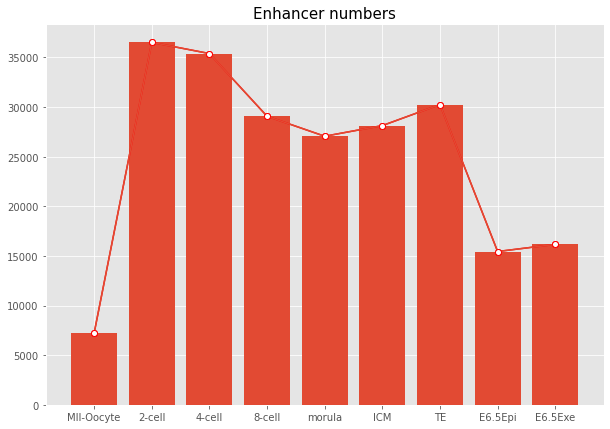

In [126]:
x=name
y=count
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x=x, height=y)
ax.set_title("Enhancer numbers", fontsize=15)
plt.plot(x, y, 'ro-')
plt.plot(x, y, marker='o', mec='r', mfc='w')
# plt.savefig('enhancer_numbers.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>